In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import math
import datetime
import platform

In [2]:
#Descargando imágenes
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#Parámetros de imágenes
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('Ancho de imagen:', IMAGE_WIDTH);
print('Alto de imagen:', IMAGE_HEIGHT);

Ancho de imagen: 28
Alto de imagen: 28


In [4]:
#Para poder analizar la data. Cada celda es un color de pixel
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


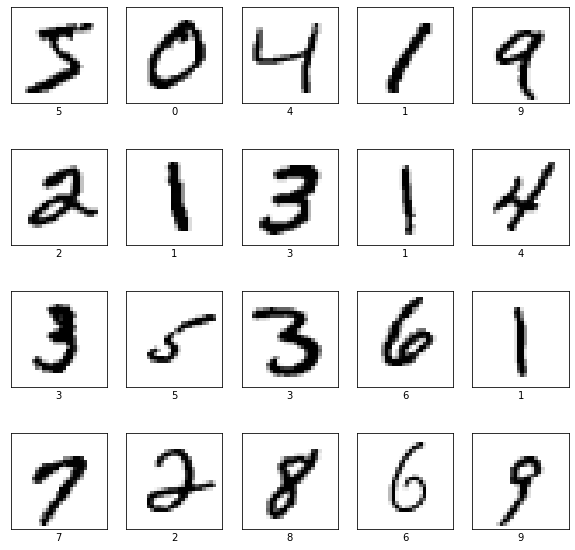

In [5]:
#Algunos ejemplos 
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [6]:
#Redimensionando
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [7]:
#Normalizando datos
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [8]:
#Después de la normalización
x_train_normalized[0][20]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.09411765],
       [0.44705882],
       [0.86666667],
       [0.99215686],
       [0.99215686],
       [0.99215686],
       [0.99215686],
       [0.78823529],
       [0.30588235],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [9]:
#Haciendo el modelamiento 
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [10]:
#Modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [11]:
#Utilizando el algoritmo de aprendizaje
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [12]:
#Haciendo las pruebas de entrenamiento
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 35s 3ms/step - loss: 0.2051 - accuracy: 0.9366 - val_loss: 0.0578 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0701 - accuracy: 0.9783 - val_loss: 0.0423 - val_accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0356 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0372 - val_accuracy

Text(0.5, 1.0, 'Training and validation loss')

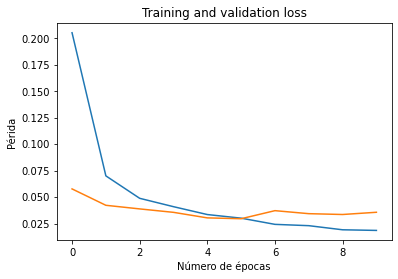

In [13]:
#Gráfica de Training and validation loss 
plt.xlabel('Número de épocas')
plt.ylabel('Périda')
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Training and validation loss')

Text(0.5, 1.0, 'Training and validation accuracy')

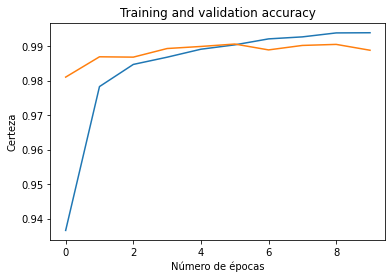

In [14]:
#Gráfica de Training and validation accuracy 
plt.xlabel('Número de épocas')
plt.ylabel('Certeza')
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Training and validation accuracy')

In [15]:
#Analizando precisión
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)
print('Precisión Final: ','[',validation_loss,validation_accuracy,']')

313/313 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9889
Precisión Final:  [ 0.03570447489619255 0.9889000058174133 ]


In [16]:
#Transformado modelo para las predicciones a Keras
modelo_nombre = 'Modelo predicciones.h5'
model.save(modelo_nombre, save_format='h5')
modelo = tf.keras.models.load_model(modelo_nombre)

In [17]:
#Usando el modelo
predicciones = modelo.predict([x_test_normalized])
predicciones = np.argmax(predicciones, axis=1)
pd.DataFrame(predicciones)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


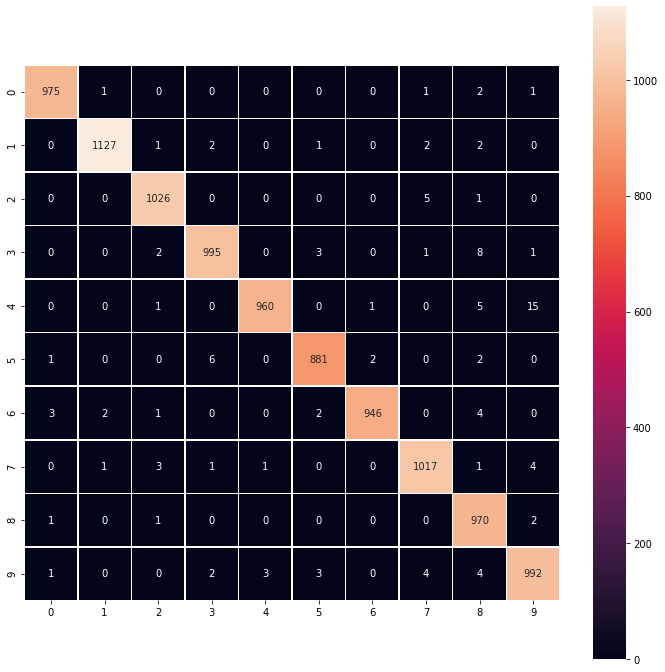

In [18]:
#Matriz de confusión
confusion_matrix = tf.math.confusion_matrix(y_test, predicciones)
f, ax = plt.subplots(figsize=(12, 12))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()